# Data Exploration
## Dataset

In [83]:
import pandas as pd

df = pd.read_csv('labels.csv')
df = df.sample(frac=1).reset_index(drop=True)
df.head(8)

,seal_id,rec_name,rhonchus_l,rhonchus_r,whistling_l,whistling_r
0,PV21036,PV21036_200221,2,2,0,0
1,PV19062,PV19062_250119,0,?,0,?
2,PV19016,PV19016_050119,1,0,0,0
3,PV18248,PV18248_181218,0,0,1,1
4,PV18262,PV18262_241218,3,3,0,0
5,PV19002,PV19002_020119,1,1,1,0
6,PV19049,PV19049_160119,0,2,0,0
7,PV19051,PV19051_180119,1,1,0,0


## Distribution

1    31
0    24
3     9
2     8
Name: rhonchus_l, dtype: int64
0    42
1    30
Name: whistling_l, dtype: int64


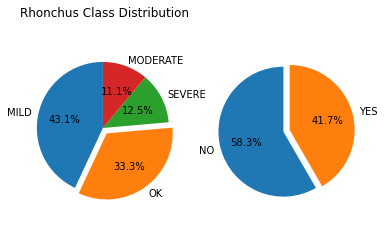

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
r_explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
w_explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

rhonchus_labels = ['MILD', 'OK', 'SEVERE', 'MODERATE']
whistling_labels = ['NO', 'YES']

fig, ax = plt.subplots(1, 2)

ax[0].pie(df.rhonchus_l.value_counts(), explode=r_explode, labels=rhonchus_labels, autopct='%1.1f%%',
          shadow=False, startangle=90)
ax[0].axis('equal')
ax[0].set_title("Rhonchus Class Distribution")

ax[1].pie(df.whistling_l.value_counts(), explode=w_explode, labels=whistling_labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax[1].axis('equal')

print(df.rhonchus_l.value_counts())
print(df.whistling_l.value_counts())


# Methodology
## Data Augmentation

SyntaxError: invalid syntax (<ipython-input-5-9a97139988e1>, line 16)

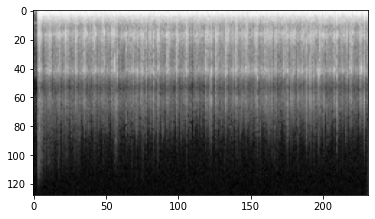

In [91]:
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

y, sr = librosa.load('recordings/PV21026/PV21026_L.wav', sr=None)

# settings
hop_length = 512  # number of samples per time-step in spectrogram
n_mels = 128  # number of bins in spectrogram. Height of image
time_steps = 128  # number of time-steps. Width of image

 # use log-melspectrogram
mels = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels,
                                      n_fft=hop_length * 2, hop_length=hop_length)
mels = np.log(mels + 1e-9)  # add small number to avoid log(0)
pad_width = 128 - mels.shape[1]
# min-max scale to fit inside 8-bit range
img = scale_minmax(mels, 0, 255).astype(np.uint8)
img = 255 - img  # invert. make black==more energy

plt.imshow(img, cmap='Greys')

# fig, ax = plt.subplots()
# img = librosa.display.specshow(img, y_axis='mel', x_axis='time', ax=ax)
# ax.set(title='Mel spectrogram display')
# fig.colorbar(img, ax=ax, format="%+2.f dB")
